## Homework 3
### Part 1: Imbalanced Dataset

 In this homework, you will be working with an imbalanced Dataset. The dataset is Credit Card Fraud Detection dataset which was hosted on Kaggle. The aim is to detect fraudlent transactions.

### Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

### Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Feel free to import any other packages you'd like to
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics._plot import roc_curve
from sklearn.metrics import RocCurveDisplay
#sklearn.__version__

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling._smote.base import SMOTE  

### **Data Preprocessing and Exploration**
Download the Kaggle Credit Card Fraud data set. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [ ]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### **1.1 Examining the class Imbalance**
**1.1.1 How many observations are in this dataset? How many are positive and negative?**
(Note: Positive labels are labeled as 1)

In [ ]:
# Your Code here
print(raw_df.shape[0], 'observations')
print(raw_df['Class'].value_counts())

284807 observations
0    284315
1       492
Name: Class, dtype: int64


284315 negative, 492 positive

#### **1.2 Cleaning and normalizing the data**
The raw data has a few issues. We are not sure what the time column actually means so drop the Time column. The Amount column also has a wide range of values covered so we take the log of the Amount column to reduce its range.

In [ ]:
cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)

**1.2.1 Split the dataset into development and test sets. Please set test size as 0.2 and random state as 42. Print the shape of your development and test features**

In [ ]:
# Your Code Here
df_X=cleaned_df.drop(columns='Class')
df_y=cleaned_df['Class']

X_dev, X_test, y_dev, y_test = train_test_split(df_X, df_y, test_size=0.2, stratify=df_y, random_state=42)

print('shape of development features:', X_dev.shape)
print('shape of test features:',X_test.shape)

shape of development features: (227845, 29)
shape of test features: (56962, 29)


**1.2.2 Normalize the features using Standard Scaler from Sklearn.**

In [ ]:
# Your Code Here
scaler = StandardScaler()
X_dev = scaler.fit_transform(X_dev)   # Fit and transform scalar on X_train
X_test = scaler.transform(X_test)

#### **1.3 Defining Model and Performance Metrics**

**1.3.1 First, let us fit a default Decision tree classifier. ( use max_depth=10 and random_state=42). Print the AUC and Average Precision values of 5 Fold Cross Validation**

In [ ]:
# Your Code here
clf = DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
scores=cross_validate(clf, X_dev, y_dev, cv=5, scoring=['roc_auc', 'average_precision'])

In [ ]:
print('AUC:', scores['test_roc_auc'])
print('AUC mean:', scores['test_roc_auc'].mean())
print('Average Precision', scores['test_average_precision'])
print('Average Precision mean:', scores['test_average_precision'].mean())
# roc_auc:
# Area Under the Receiver Operating Characteristic Curve 
# average_precision: 
# for the precision-recall curve, plot p(r), precision as a function of recall. 
# average_precision computes the average value of p(r) over the interval from r=0 to r=1

AUC: [0.88756328 0.88400873 0.81260522 0.77454358 0.82104149]
AUC mean: 0.8359524571279693
Average Precision [0.62653551 0.71014615 0.60399496 0.58692296 0.68112078]
Average Precision mean: 0.641744070059615


**1.3.2 Perform random oversampling on the development dataset.**


*   What many positive and negative labels do you observe after random oversampling?
*   What is the shape of your development dataset?

(Note: Set random state as 42 when performing oversampling)


In [ ]:
# Your Code here
ros=RandomOverSampler(random_state=42)
X_dev_oversample, y_dev_oversample=ros.fit_resample(X_dev, y_dev)
print('shape of oversampled development dataset', X_dev_oversample.shape)
print(y_dev_oversample.value_counts())

shape of oversampled development dataset (454902, 29)
0    227451
1    227451
Name: Class, dtype: int64


**1.3.3 Repeat 1.3.1 using the dataset you created in the above step(1.3.2 Random oversampling). (Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10 and random_state=42. This will help us to compare the models)**

In [ ]:
# Your Code here
scores=cross_validate(clf, X_dev_oversample, y_dev_oversample, cv=5, scoring=['roc_auc', 'average_precision'])

In [ ]:
print('AUC:', scores['test_roc_auc'])
print('AUC mean:', scores['test_roc_auc'].mean())
print('Average Precision', scores['test_average_precision'])
print('Average Precision mean:', scores['test_average_precision'].mean())

AUC: [0.99886808 0.99929956 0.99900977 0.99926441 0.99932258]
AUC mean: 0.9991528810903473
Average Precision [0.99816396 0.99884446 0.99826911 0.9986672  0.99874564]
Average Precision mean: 0.9985380738652964


**1.3.4 Perform Random undersampling on the development dataset**. 
- What many positive and negative labels do you observe after random undersampling?
- What is the shape of your development dataset?
(Note: Set random state as 42 when performing undersampling)

In [ ]:
# Your Code here
rus=RandomUnderSampler(replacement=False, random_state=42)
X_dev_undersample,y_dev_undersample=rus.fit_resample(X_dev, y_dev)
print('shape of undersampled development dataset', X_dev_undersample.shape)
print(y_dev_undersample.value_counts())

shape of undersampled development dataset (788, 29)
0    394
1    394
Name: Class, dtype: int64


**1.3.5 Repeat 1.3.1 using the dataset you created in the above step(1.3.4 Random undersampling). (Make sure you use the same hyperparameters as 1.3.1. i,e., max_depth=10 and random_state=42. This will help us to compare the models)**

In [ ]:
# Your Code here
scores=cross_validate(clf, X_dev_undersample, y_dev_undersample, cv=5, scoring=['roc_auc', 'average_precision'])

In [ ]:
print('AUC:', scores['test_roc_auc'])
print('AUC mean:', scores['test_roc_auc'].mean())
print('Average Precision', scores['test_average_precision'])
print('Average Precision mean:', scores['test_average_precision'].mean())

AUC: [0.93662875 0.94936709 0.9097901  0.92583577 0.92989289]
AUC mean: 0.9303029182535673
Average Precision [0.91336577 0.92661432 0.86678359 0.90629539 0.89830283]
Average Precision mean: 0.9022723811037444


**1.3.6 Perform Synthetic Minority Oversampling Technique(SMOTE) on the development dataset**
- What many positive and negative labels do you observe after performing SMOTE?
- What is the shape of your development dataset? (Note: Set random state as 42 when performing SMOTE)

In [ ]:
# Your code here
smote=SMOTE(random_state=42)
X_dev_smote,y_dev_smote=smote.fit_resample(X_dev, y_dev)
print('shape of smote development dataset', X_dev_smote.shape)
print(y_dev_smote.value_counts())

shape of smote development dataset (454902, 29)
0    227451
1    227451
Name: Class, dtype: int64


**1.3.7 Repeat 1.3.1 using the dataset you created in the above step(1.3.6 SMOTE). (Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10 and random_state=42. This will help us to compare the models)**

In [ ]:
# Your Code here # 2m
scores=cross_validate(clf, X_dev_smote, y_dev_smote, cv=5, scoring=['roc_auc', 'average_precision'])

In [ ]:
print('AUC:', scores['test_roc_auc'])
print('AUC mean:', scores['test_roc_auc'].mean())
print('Average Precision', scores['test_average_precision'])
print('Average Precision mean:', scores['test_average_precision'].mean())

AUC: [0.99757923 0.99738426 0.99772842 0.9972463  0.99714931]
AUC mean: 0.9974175030591891
Average Precision [0.99667622 0.99645425 0.99685462 0.99619248 0.99611009]
Average Precision mean: 0.9964575330041552


**1.3.8 Make predictions on the test set using the four models that you built and report their AUC values.**

In [ ]:
clf_original=clf.fit(X_dev, y_dev)
y_pred_original=clf_original.predict_proba(X_test)[:, 1]
y_pred_original_l=clf_original.predict(X_test)
print('original test AUC:', roc_auc_score(y_test, y_pred_original))

original test AUC: 0.8196316775866227


In [ ]:
# Your Code here
clf_oversample=clf.fit(X_dev_oversample, y_dev_oversample)
y_pred_oversample=clf_oversample.predict_proba(X_test)[:, 1]
y_pred_oversample_l=clf_oversample.predict(X_test)
print('oversample test AUC:', roc_auc_score(y_test, y_pred_oversample))

oversample test AUC: 0.9016732009348478


In [ ]:
clf_undersample=clf.fit(X_dev_undersample,y_dev_undersample)
y_pred_undersample=clf_undersample.predict_proba(X_test)[:, 1]
y_pred_undersample_l=clf_undersample.predict(X_test)
print('undersample test AUC:', roc_auc_score(y_test, y_pred_undersample))

undersample test AUC: 0.8959979162599198


In [ ]:
clf_smote=clf.fit(X_dev_smote,y_dev_smote)
y_pred_smote=clf_smote.predict_proba(X_test)[:, 1]
y_pred_smote_l=clf_smote.predict(X_test)
print('SMOTE test AUC:', roc_auc_score(y_test, y_pred_smote))

SMOTE test AUC: 0.8752678248423735


**1.3.9 Plot Confusion Matrices for all the four models on the test set. Comment your results**

In [ ]:
# Your Code here
print('original data: \n', confusion_matrix(y_test, y_pred_original_l))
print('oversample data: \n', confusion_matrix(y_test, y_pred_oversample_l))
print('undersample data: \n', confusion_matrix(y_test, y_pred_undersample_l))
print('smote data: \n', confusion_matrix(y_test, y_pred_smote_l))

original data: 
 [[56852    12]
 [   24    74]]
oversample data: 
 [[56326   538]
 [   19    79]]
undersample data: 
 [[52358  4506]
 [    9    89]]
smote data: 
 [[56032   832]
 [   17    81]]


With the same model, the undersample data performs the best on the minority class (positive class). It has the highest true positive rate/recall. But the undersample data perform the worst on the majority class (zero class), with the lowest true negative rate. 
The original data perfoms the best on the majority data, with the highest true negative rate. But the original data performs data perform the worst on the minority class, with the lowest true positive rate.
The oversample data and SMOTE data balance the performance on the majority and minority class. 

**1.3.10 Plot ROC for all the four models on the test set in a single plot. Make sure you label axes and legend properly. Comment your results**

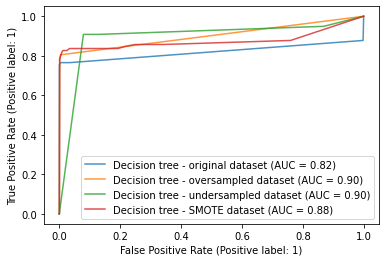

In [ ]:
# Your code
ax = plt.gca() # Get the current Axes
RocCurveDisplay.from_predictions(y_test, y_pred_original, name='Decision tree - original dataset', ax=ax, alpha=0.8)
RocCurveDisplay.from_predictions(y_test, y_pred_oversample, name='Decision tree - oversampled dataset', ax=ax, alpha=0.8)
RocCurveDisplay.from_predictions(y_test, y_pred_undersample, name='Decision tree - undersampled dataset', ax=ax, alpha=0.8)
RocCurveDisplay.from_predictions(y_test, y_pred_smote, name='Decision tree - SMOTE dataset', ax=ax, alpha=0.8)
plt.show();
#RocCurveDisplay(fpr=fpr_original, tpr=tpr_original, estimator_name='original dataset')

The model trained with oversampled data has the highest AUC, so it's has the best general accuracy. It performs the best near the right end. The model trained with undersampled data performs the best around the range where FPR is from 0.1 to 0.7. In fact, the these two models have similar AUC, so we shall decide which model to use depends on our goal. 

**1.3.11 Train a balanced default Decision tree classifier. (use max_depth=10 and random_state=42). ( balance the class weights). Print the AUC and average precision on dev set**

In [ ]:
# Your code here
bal_clf=DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [ ]:
# 1m
scores=cross_validate(bal_clf, X_dev, y_dev, cv=5, scoring=['roc_auc', 'average_precision'])

In [ ]:
print('AUC mean:', scores['test_roc_auc'].mean())
print('Average Precision mean:', scores['test_average_precision'].mean())

AUC mean: 0.905514887383234
Average Precision mean: 0.5236357414975382


<!-- **1.3.12 Train a balanced Decision tree classifier. (You can use max_depth=10 and random_state=42)( balance the class weights). Print the AUC and average precision on test set** (Use Random state = 42) -->

**1.3.12 Plot confusion matrix on test set using the above model and comment on your results**

In [ ]:
# Your code here
bal_clf.fit(X_dev, y_dev)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [ ]:
y_pred_bal_l=bal_clf.predict(X_test)
print('balanced default Decision tree classifier on original data: \n', confusion_matrix(y_test, y_pred_bal_l))

balanced default Decision tree classifier on original data: 
 [[56357   507]
 [   19    79]]


Compared to the decision tree model trained on original data, the balanced deccision tree model trained on the same data has better performance on the minority class yet worse performance on the majority class. Compared to decision tree model trained on oversampled data, the balanced deccision tree model trained on the same data has the same performance on the minority class and better performance on the majority class. The balanced deccision tree model also has a slight higher AUC than the decision tree model trained on oversampled data. So, balanced deccision tree model improves the performance on the minority class at a low cost of the performance on the majority class. 